<a href="https://colab.research.google.com/github/Pires1789/tratamento_valores_ausentes/blob/main/FAD_Projeto04_Imputacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregamento e preparação inicial dos dados

### Bibliotecas e configurações

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Configurações gerais

pd.set_option('display.max_columns', 20)
warnings.filterwarnings("ignore")

### Funções

In [3]:
# Função para carregar o arquivo inicial com os dados

def carregar_dataset(caminho_arquivo):
    """
    Carrega o dataset a partir do caminho fornecido e realiza a preparação inicial dos dados.

    Parâmetros:
    caminho_arquivo (str): Caminho para o arquivo CSV.

    Retorna:
    pd.DataFrame: DataFrame com o dataset carregado e preparado.
    """
    df = pd.read_csv(caminho_arquivo)
    return df

In [4]:
# Função para exibir informações gerais do DataFrame

def exibir_info_dataset(df):
    """
    Exibe o formato e informações do DataFrame, incluindo tipos de dados e valores nulos.

    Parâmetros:
    df (pd.DataFrame): DataFrame a ser analisado.
    """
    print("Formato do DataFrame:", df.shape)
    df.info()
    print("\nValores nulos por coluna:\n", df.isna().sum())

In [5]:
def resumo_variavel(df, variavel):
    """
    Exibe um resumo estatístico de uma variável numérica em um DataFrame, incluindo:
    - Quantidade de valores ausentes.
    - Média.
    - Mediana.
    - Moda.

    Parâmetros:
    df (pd.DataFrame): O DataFrame que contém a variável a ser analisada.
    variavel (str): O nome da coluna (variável) que será analisada.

    Retorna:
    tuple: Retorna uma tupla contendo a quantidade de valores ausentes, a média, a mediana e a moda da variável.
    Cada um desses valores é exibido na tela e também retornado pela função.
    """

    variavel_ausente = print(f'Valores ausentes na coluna {variavel}: {df[variavel].isnull().sum()}')
    variavel_media = print(f'Média da coluna {variavel}: {round(df[variavel].mean(), 0)}')
    variavel_mediana = print(f'Mediana da coluna {variavel}: {df[variavel].median()}')
    variavel_moda = print(f'Moda da coluna {variavel}: {df[variavel].mode()[0]}')

### Preparação inicial dos dados

In [6]:
# Caminho para o dataset
url = r'...dataset.csv'
df = carregar_dataset(url)

# Exibindo informações do dataset
exibir_info_dataset(df)



Formato do DataFrame: (45211, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  obje

In [7]:
# Exibindo as primeiras linhas do DataFrame
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Etapa 01 - Variável 'Age'

A primeira etapa será dedicada a análise da variável 'Age'. \
Vamos seguir os passos:

1.   Verificar como essa variável se comporta
2.   Aplicar técnicas para limpar os valores nulos
3.   Avaliar se nossa proposta de limpeza alterou significativamente os dados ou não.




In [8]:
resumo_variavel(df, 'age')

Valores ausentes na coluna age: 20
Média da coluna age: 41.0
Mediana da coluna age: 39.0
Moda da coluna age: 32.0


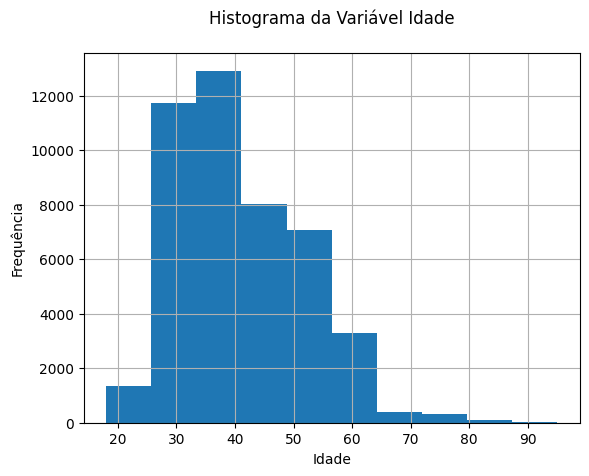

In [9]:
df.hist('age')
plt.title("Histograma da Variável Idade\n")

plt.xlabel("Idade")
plt.ylabel("Frequência")

plt.show()

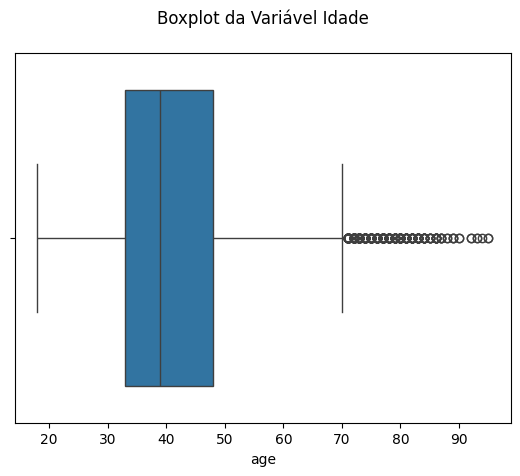

In [10]:
sns.boxplot(x=df['age'])
plt.title("Boxplot da Variável Idade\n")

plt.show()

Interpretando o **histograma**, avaliamos uma tendência de **distribuição assimétrica à direita**, e a maioria dos clientes são jovens.
Nossos clientes estão majoritariamente entre 30-40 anos e a frequência cai apartir dos 50 anos. O **boxplot** reforça o nosso histograma ao determinar que a mediana dos nossos dados é de 40 anos e a maioria das pessoas estão entre 30 e 50 anos.

A distribuição é **relativamente simétrica**.

Em função da mediana ser de **40 anos**, vamos imputar esse valor nos dados ausentes de idade.

In [11]:
df['age'].fillna(df['age'].median(), inplace=True)

O interpretador informou que a variável idade considera um datatype do tipo float. Vamos alternar para int para que os dados fiquem mais coesos.

In [12]:
df['age'] = df['age'].round(0)

df['age'] = df['age'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45211 non-null  int64  
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

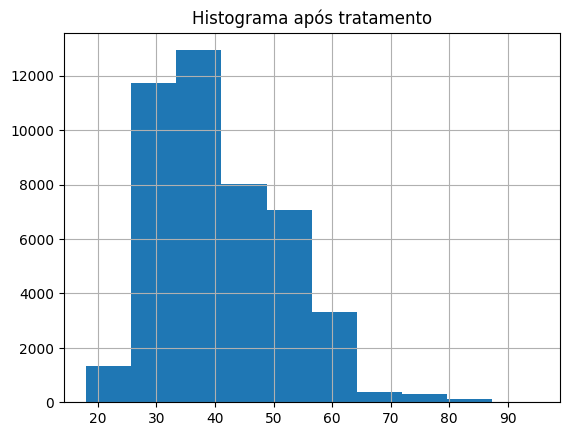

In [13]:
df.hist('age')
plt.title('Histograma após tratamento')
plt.show()

## Etapa 02 - Variável 'Month'

Vamos seguir passos similares, mas é importante destacar que a variável é categórica e algumas alterações serão necessárias. Nossa proposta para tratar esses valores ausentes é:

1. Identificar o total de valores ausentes para a variável;
2. Identificar a moda de 'Month';
3. Imputar os dados;
4. Alterar o formato da data.

In [14]:
# Total de valores ausentes

df['month'].isnull().sum()

50

In [15]:
# Qual o valor com maior incidência (moda)?

df['month'].mode()

,month
0,"may, 2017"


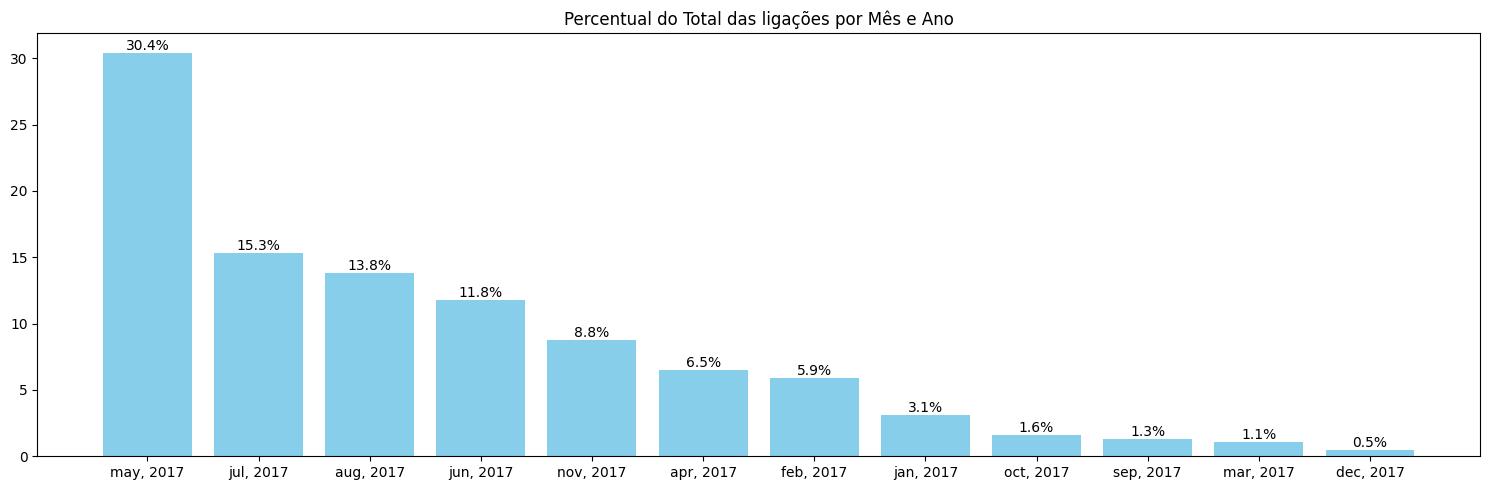

In [16]:
# Criando gráfico do percentual do total de cada membro de 'Month'

counts = df['month'].value_counts()
total = counts.sum()

df_counts = counts.reset_index()
df_counts.columns = ['month', 'count']
df_counts['percent'] = round((df_counts['count']/total)*100,1)

plt.figure(figsize=(15,5))
barras = plt.bar(df_counts['month'],df_counts['percent'], color='skyblue')

for barra in barras:
    valor_y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, valor_y, f'{valor_y:.1f}%', ha='center', va='bottom')

plt.title('Percentual do Total das ligações por Mês e Ano')

plt.tight_layout()
plt.show()

In [17]:
df['month'].fillna('may, 2017', inplace=True)
df.month.isna().sum()

0

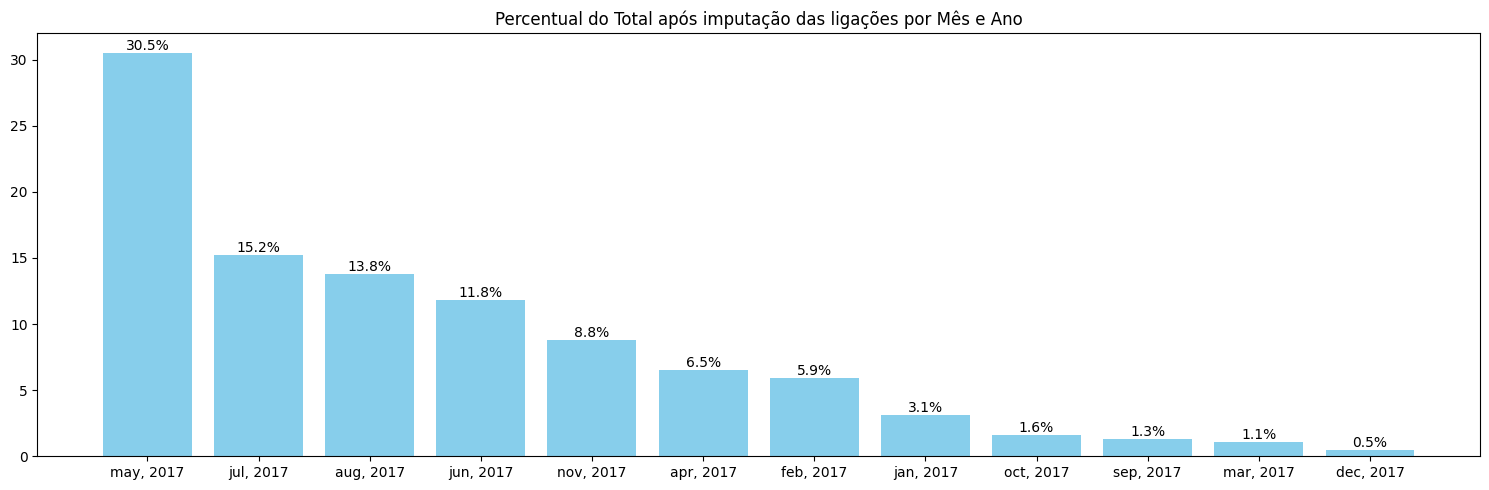

In [18]:
# Criando gráfico do percentual do total de cada membro de 'Month'

counts = df['month'].value_counts()
total = counts.sum()

df_counts = counts.reset_index()
df_counts.columns = ['month', 'count']
df_counts['percent'] = round((df_counts['count']/total)*100,1)

plt.figure(figsize=(15,5))
barras = plt.bar(df_counts['month'],df_counts['percent'], color='skyblue')

for barra in barras:
    valor_y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, valor_y, f'{valor_y:.1f}%', ha='center', va='bottom')

plt.title('Percentual do Total após imputação das ligações por Mês e Ano')

plt.tight_layout()
plt.show()

Após a imputação fica claro que não houve nenhuma alteração significativa nos dados.
Entretanto, a coluna relativa a data pode ser melhor formatada. Vamos a esse ajuste.

In [19]:
df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'], format='%d %b, %Y').dt.strftime('%d/%m/%Y')
df = df.drop(columns=['day', 'month'])
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,response,date
0,1,58,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,261 sec,1,-1,0,unknown,no,05/05/2017
1,2,44,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,151 sec,1,-1,0,unknown,no,05/05/2017
2,3,33,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,76 sec,1,-1,0,unknown,no,05/05/2017
3,4,47,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,92 sec,1,-1,0,unknown,no,05/05/2017
4,5,33,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,198 sec,1,-1,0,unknown,no,05/05/2017


## Etapa 03 - Variável 'Salary'

Esta etapa existem algumas considerações que podemos fazer com os dados. Primeiro, vamos verificar se há alguma correlação entre salário e tipo de trabalho. Para isso vamos ajustar a coluna 'jobedu' antes.

In [20]:
df[['job', 'education']] = df['jobedu'].str.split(',', expand=True)

df = df.drop(columns=['jobedu'])

In [21]:
df.groupby('job')['salary'].mean().reset_index()

,job,salary
0,admin.,50000.0
1,blue-collar,20000.0
2,entrepreneur,120000.0
3,housemaid,16000.0
4,management,100000.0
5,retired,55000.0
6,self-employed,60000.0
7,services,70000.0
8,student,4000.0
9,technician,60000.0


Como podemos perceber, existem pessoas com a condição de desempregadas que possuem algum tipo de renda. Identificamos também pessoas com a condição de 'unknown' sem salário. Vamos concentrar essas condições em uma nova coluna. A regra de negócio que adotaremos será:

Se Variável 'Salary' for igual a 0 **OU** Variável 'Job' for igual a 'unemployed' o usuário será considerado desempregado.

In [22]:
# Cria coluna que segmenta entre empregados e desempregados com base no salário

df['employed'] = np.where((df['salary'] == 0) | (df['job'] == 'unemployed'), 'unemployed', 'employed')

In [23]:
# Filtragem de registros onde o salário é igual a zero
df_salario_e_zero = df[df['salary'] == 0.0]

# Verificação da hipótese de que todos os registros com salário zero correspondem a pessoas desempregadas
hipotese_desemprego = df_salario_e_zero['employed'].eq('unemployed').all()

# Retorno da variável hipotese_desemprego, que será True se todos os registros com salário zero forem desempregados,
# ou False caso contrário
hipotese_desemprego

True

Essa validação foi importante porque nem sempre valores nulos são absolutamente explícitos. A ausência de informação (o valor zero) também poderia indicar um problema nos nossos dados.

In [24]:
df.salary.isna().sum()

26

Verificando a média dos salários e algumas linhas do DF podemos perceber que os salários são os mesmos para todos (algo que só ocorre porque esses são dados para teste...). Então podemos aplicar a média salarial por categoria para cada linha nula.
Nós vamos verificar qual a média de cada caso e depois criar uma função que preencha os valores nulos.

In [25]:
df[df['employed'] == 'employed'].groupby('job')['salary'].mean().reset_index()

,job,salary
0,admin.,50000.0
1,blue-collar,20000.0
2,entrepreneur,120000.0
3,housemaid,16000.0
4,management,100000.0
5,retired,55000.0
6,self-employed,60000.0
7,services,70000.0
8,student,4000.0
9,technician,60000.0


In [26]:
def substituir_salario_nan(row, media_salarios):
    """
    Substitui valores ausentes (NaN) na coluna 'salary' com base na média salarial por ocupação,
    desde que a pessoa esteja empregada.

    Parâmetros:
    row (pd.Series): Uma linha do DataFrame contendo as informações de um indivíduo.
    media_salarios (dict): Um dicionário contendo a média salarial por ocupação (job).
                           As chaves são os nomes das ocupações e os valores são as médias correspondentes.

    Retorna:
    float: O valor do salário substituído pela média correspondente ao 'job' do indivíduo se ele estiver
           empregado e o salário for NaN, ou o valor original do salário se ele não for NaN.
    """
    if pd.isna(row['salary']) and row['employed'] == 'employed':
        return media_salarios.get(row['job'], np.nan)
    return row['salary']

In [27]:
media_salarios_por_job = df[df['employed'] == 'employed'].groupby('job')['salary'].mean().to_dict()

In [28]:
df['salary'] = df.apply(substituir_salario_nan, axis=1, media_salarios=media_salarios_por_job)


In [29]:
df.salary.isna().sum()

0

## Etapa 04 - Variável 'Response'

In [ ]:
df['response'].isna().sum()

Nós sabemos que existem valores ausentes na variável, porém ela indica se um cliente contratou ou não o produto. Neste sentido, vamos elimitar esses registros já que não existem informações suficientes para saber como tratar esses registros.

In [ ]:
df.dropna(subset='response', inplace=True)

df.isnull().sum()

## Etapa 05 - Variável 'Pdays'

In [ ]:
df.pdays.describe()

In [ ]:
pdays_media = df['pdays'].mean()
pdays_mediana = df['pdays'].median()
pdays_moda = df['pdays'].mode()

print(pdays_media)
print(pdays_mediana)
print(pdays_moda)

In [ ]:
df.pdays = df.pdays.replace({-1.0:np.NaN})
round(df.pdays.isnull().mean()*100,2)

Como 81% dos registros de pdays não possuem informação, não faz sentido que ela esteja disponível no df.
Portanto, vamos criar um conjunto de dados com essa variável NaN e reenviar a área de negócio.
O df pronto poderá seguir para outras análises.

In [ ]:
df_pdays_negativos = df[df['pdays'].isna()]
df_pdays_negativos.head()

In [ ]:
df_pdays_positivos = df[df['pdays'] >= 1]
df_pdays_positivos.head()